# Merging EB terms-  NLS -  Encyclopaedia Britannica


### Loading the necessary libraries

In [1]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections
import matplotlib as mpl

In [2]:
import pandas as pd
from yaml import safe_load
from pandas.io.json import json_normalize

### Functions

In [3]:
def read_query_results(filename):
    with open('./results_NLS/'+filename, 'r') as f:
        query_results = safe_load(f)
    return query_results


In [4]:
def write_query_results(filename, results):
    with open('./results_NLS/'+filename, 'w') as f:
        documents = yaml.dump(results, f)

In [14]:
def create_dataframe(query_results):
    for page in query_results:
        column_list=list(query_results[page][0].keys())
        break
        
    data=[]
    for page in query_results:
        try:
            data.append(query_results[page][0])
        except:
            pass
    return pd.DataFrame(data, columns = column_list)

In [6]:
def create_dataframe_from_file(filename):
    with open('./results_NLS/'+filename, 'r') as f:
        query_results = safe_load(f)
    
    for page in query_results:
        column_list=list(query_results[page][0].keys())
        break
        
    data=[]
    for page in query_results:
        try:
            data.append(query_results[page][0])
        except:
            pass
    return pd.DataFrame(data, columns = column_list)

In [7]:
def prune_json(json_dict):
    """
    Method that given a JSON object, removes all its empty fields.
    This method simplifies the resultant JSON.
    :param json_dict input JSON file to prune
    :return JSON file removing empty values
    """
    final_dict = {}
    if not (isinstance(json_dict, dict)):
        # Ensure the element provided is a dict
        return json_dict
    else:
        for a, b in json_dict.items():
            if b or isinstance(b, bool):
                if isinstance(b, dict):
                    aux_dict = prune_json(b)
                    if aux_dict:  # Remove empty dicts
                        final_dict[a] = aux_dict
                elif isinstance(b, list):
                    aux_list = list(filter(None, [prune_json(i) for i in b]))
                    if len(aux_list) > 0:  # Remove empty lists
                        final_dict[a] = aux_list
                else:
                    final_dict[a] = b
    return final_dict

In [8]:
def merge_terms(query_results):
    for page in query_results:
        for element in query_results[page]:
            if "previous_page" in element['term']:
                current_page=int(element['text_unit_id'].split("Page")[1])
                current_definition= element["definition"]
                previous_page_number= current_page-1
                previous_page=previous_page_number
                num_article_words=element["num_article_words"]
                related_terms=element["related_terms"]
                try:
                    if query_results[previous_page]:
                        flag_prev = 1
                except:
                    flag_prev = 0
                while not flag_prev:
                    previous_page_number = previous_page_number -1
                    previous_page=previous_page_number
                    try: 
                        if query_results[previous_page]:
                            flag_prev = 1
                    except:
                        flag_prev = 0
        
                #print("Current Page %s - Previous Page %s" %(element['text_unit_id'], previous_page))
                for prev_elements in query_results[previous_page]:
                    if prev_elements["last_term_in_page"]:
                        prev_elements["definition"]+=current_definition
                        prev_elements["num_article_words"]+=num_article_words
                        prev_elements["related_terms"]+= related_terms
                    
                    prev_elements["num_page_words"]+=num_article_words
                    
                for update_element in query_results[page]:
                    update_element["num_page_words"]-=num_article_words
                    update_element["num_articles"]-=1
                    
                element_index=query_results[page].index(element)
                del query_results[page][element_index]
    return query_results

In [37]:
query_results=read_query_results('results_eb_first')

In [38]:
query_results_updated=merge_terms(query_results)

In [39]:
#prune_results=prune_json(query_results_updated)

In [40]:
write_query_results("results_eb_first_updated", query_results)

In [41]:
#df=create_dataframe_from_file("results_eb_first_updated")

In [42]:
df=create_dataframe(query_results_updated)

In [44]:
df.head()

,archive_filename,definition,edition,header,last_term_in_page,model,num_article_words,num_articles,num_page_words,num_text_unit,...,related_terms,source_text_file,term,term_id_in_page,text_unit,text_unit_id,title,type_archive,type_page,year
0,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,n*s-f 7^' v L i A j J ^ /^^W / ; H:;^’ J }r-r£...,"First edition, 1771, Volume 1, A-B",iiiubnsfvnsfv,1,nlsArticles,58,1,59,832,...,[],alto/188082735.34.xml,iiiubnsfvnsfv,0,page,Page2,"Encyclopaedia Britannica; or, A dictionary of ...",book,FullPage,1771
1,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,S :u -I >;J .1 M U a C V',"First edition, 1771, Volume 1, A-B",**■*,1,nlsArticles,10,1,14,832,...,[],alto/188082813.34.xml,first_article,0,page,Page8,"Encyclopaedia Britannica; or, A dictionary of ...",book,Articles,1771
2,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,COVI PILED UPON A NEW PLAN. IN WHICH The difer...,"First edition, 1771, Volume 1, A-B",FrontPage,1,nlsArticles,91,1,90,832,...,[],alto/188082826.34.xml,FrontPage,0,page,Page9,"Encyclopaedia Britannica; or, A dictionary of ...",book,FullPage,1771
3,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,UTILITY ought to be the principal intention of...,"First edition, 1771, Volume 1, A-B",Preface,1,nlsArticles,363,1,374,832,...,[],alto/188082852.34.xml,Preface,0,page,Page11,"Encyclopaedia Britannica; or, A dictionary of ...",book,FullPage,1771
4,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,"TH E Editors, though fully fen&ble of the prop...","First edition, 1771, Volume 1, A-B",viPREFACE,1,nlsArticles,410,1,416,832,...,[],alto/188082865.34.xml,viPREFACE,0,page,Page12,"Encyclopaedia Britannica; or, A dictionary of ...",book,Topic,1771


In [45]:
df.iloc[0]

archive_filename     /Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...
definition           n*s-f 7^' v L i A j J ^ /^^W / ; H:;^’ J }r-r£...
edition                             First edition, 1771, Volume 1, A-B
header                                                   iiiubnsfvnsfv
last_term_in_page                                                    1
model                                                      nlsArticles
num_article_words                                                   58
num_articles                                                         1
num_page_words                                                      59
num_text_unit                                                      832
place                                                        Edinburgh
related_terms                                                       []
source_text_file                                 alto/188082735.34.xml
term                                                     iiiubnsfvnsfv
term_i

In [46]:
print("The min number of articles per page is %s - the max is %s, and the average is %s" %(df["num_articles"].min(), df["num_articles"].max(), df["num_articles"].mean()))

The min number of articles per page is 1 - the max is 44, and the average is 6.215859030837004


In [47]:
df_related=df[df['related_terms'].apply(lambda x: len(x)) > 0]

In [48]:
df_related=df_related.explode('related_terms')

In [49]:
df_related

,archive_filename,definition,edition,header,last_term_in_page,model,num_article_words,num_articles,num_page_words,num_text_unit,...,related_terms,source_text_file,term,term_id_in_page,text_unit,text_unit_id,title,type_archive,type_page,year
7,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,"OR, A NEW A D I C T I o ARTS and S A B A A, th...","First edition, 1771, Volume 1, A-B",EncyclopaediaBritannica,1,nlsArticles,652,1,655,832,...,ASTRONOMY,alto/188082904.34.xml,EncyclopaediaBritannica,0,page,Page15,"Encyclopaedia Britannica; or, A dictionary of ...",book,FullPage,1771
7,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,"OR, A NEW A D I C T I o ARTS and S A B A A, th...","First edition, 1771, Volume 1, A-B",EncyclopaediaBritannica,1,nlsArticles,652,1,655,832,...,ABACATUAIA,alto/188082904.34.xml,EncyclopaediaBritannica,0,page,Page15,"Encyclopaedia Britannica; or, A dictionary of ...",book,FullPage,1771
10,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,"sake of their monastery, were made deniforts o...","First edition, 1771, Volume 1, A-B",ABE,1,nlsArticles,1056,1,1078,832,...,ASTRONOMY,alto/188082943.34.xml,ABE,0,page,Page18,"Encyclopaedia Britannica; or, A dictionary of ...",book,Topic,1771
10,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,"sake of their monastery, were made deniforts o...","First edition, 1771, Volume 1, A-B",ABE,1,nlsArticles,1056,1,1078,832,...,ABERRATION,alto/188082943.34.xml,ABE,0,page,Page18,"Encyclopaedia Britannica; or, A dictionary of ...",book,Topic,1771
12,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,"(6 ABRASA, in surgery, ulcers, where the Ikin ...","First edition, 1771, Volume 1, A-B",ABRABR,1,nlsArticles,1451,1,1487,832,...,RENUNCIATION,alto/188082969.34.xml,ABRABR,0,page,Page20,"Encyclopaedia Britannica; or, A dictionary of ...",book,Topic,1771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,"BLEACHING. tracts a dampness, which not only m...","First edition, 1771, Volume 1, A-B",BLEACHING,1,nlsArticles,1391,1,1405,832,...,BLEEDING,alto/188091552.34.xml,BLEACHING,0,page,Page680,"Encyclopaedia Britannica; or, A dictionary of ...",book,Topic,1771
622,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,635 SEC T. II. Of the Method of reducing Plant...,"First edition, 1771, Volume 1, A-B",BOTANV,1,nlsArticles,611,1,619,832,...,LIU,alto/188092553.34.xml,BOTANV,0,page,Page757,"Encyclopaedia Britannica; or, A dictionary of ...",book,Topic,1771
622,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,635 SEC T. II. Of the Method of reducing Plant...,"First edition, 1771, Volume 1, A-B",BOTANV,1,nlsArticles,611,1,619,832,...,LYADELP,alto/188092553.34.xml,BOTANV,0,page,Page757,"Encyclopaedia Britannica; or, A dictionary of ...",book,Topic,1771
659,/Users/rosafilgueira/HW-Work/NLS-Fellowship/wo...,"Ji-ole for a night together, that the (leant o...","First edition, 1771, Volume 1, A-B",BREWING,1,nlsArticles,1677,1,1690,832,...,ANCON,alto/188093203.34.xml,BREWING,0,page,Page807,"Encyclopaedia Britannica; or, A dictionary of ...",book,Topic,1771


In [50]:
import networkx as nx
graph_df = nx.from_pandas_edgelist(df_related, source='term', target='related_terms', edge_attr=True)

In [51]:
graph_df

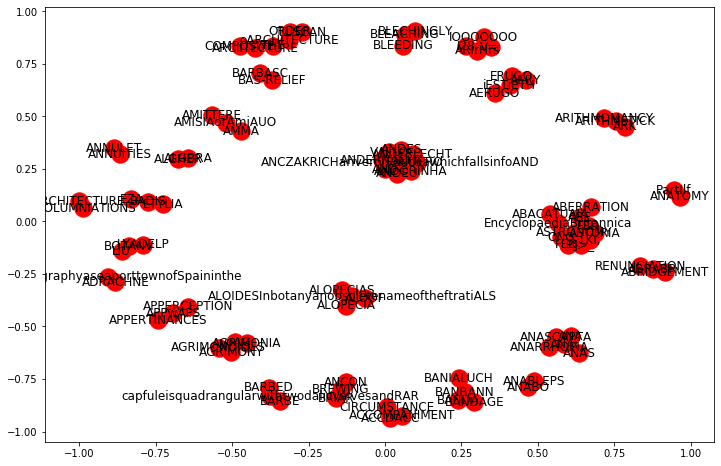

In [52]:
import matplotlib.pyplot as plt
#matplotlib inline

plt.figure(figsize=(12,8))
nx.draw_networkx(graph_df, with_labels=True)

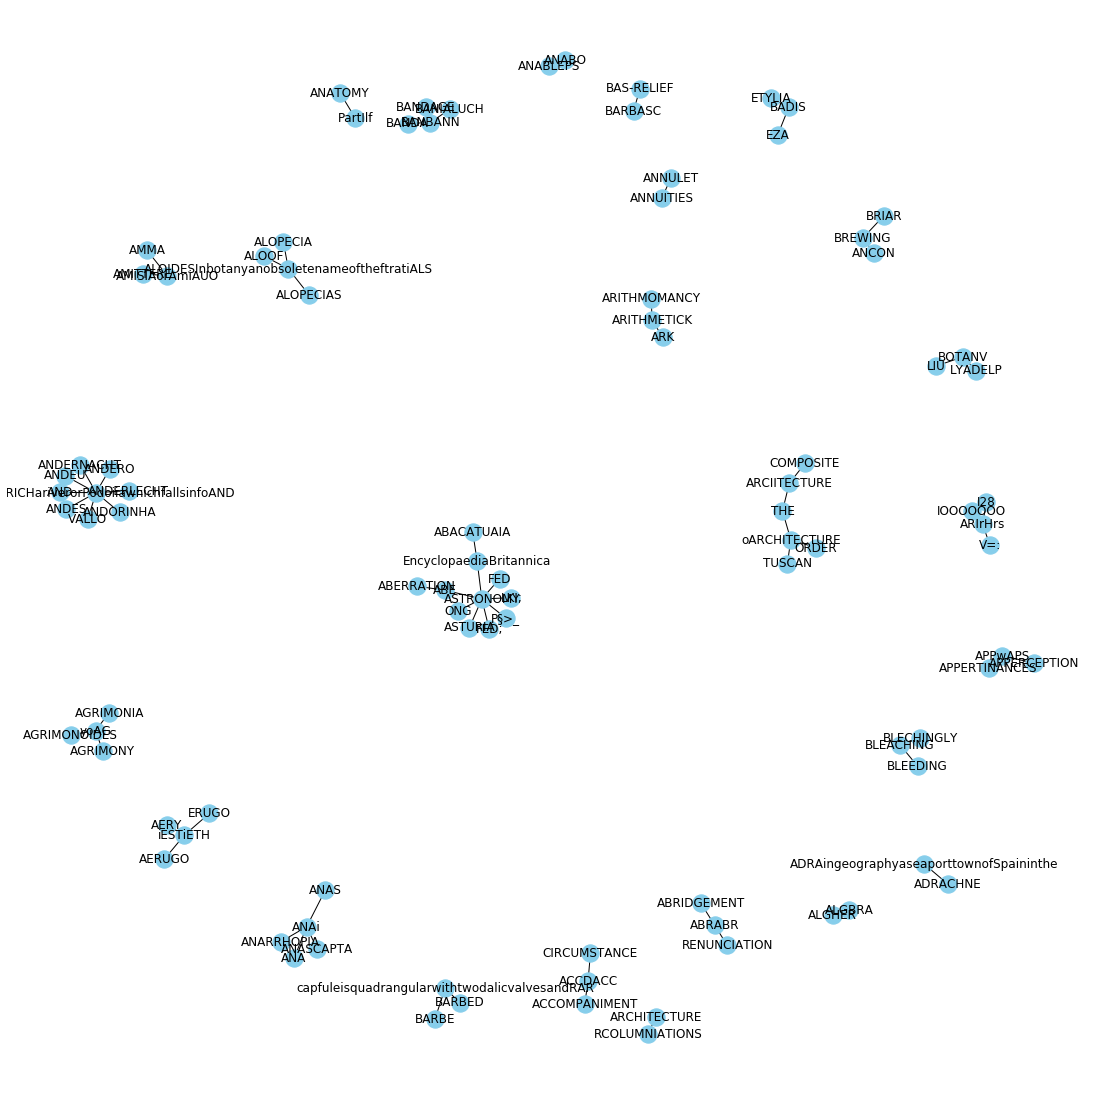

In [54]:
plt.figure(figsize=(15,15))

pos = nx.spring_layout(graph_df)
nx.draw(graph_df, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()